In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re

In [5]:
import tensorflow as tf

In [6]:
x="Hi hello how are you"
print(len(x.split()))

5


In [7]:
import nltk
from nltk.tokenize import word_tokenize
#nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords=stopwords.words("english")
#nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer


In [8]:
url="https://raw.githubusercontent.com/Sooryak12/FakeReviewDetectionLSTM/master/selected.txt"


In [9]:
df=pd.read_csv(url,delimiter="\t")
df.head()

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,1,__label1__,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav..."
1,2,__label1__,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...
2,3,__label1__,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...
3,4,__label1__,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...
4,5,__label1__,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...


In [10]:
df.isnull().sum()

DOC_ID               0
LABEL                0
RATING               0
VERIFIED_PURCHASE    0
PRODUCT_CATEGORY     0
PRODUCT_ID           0
PRODUCT_TITLE        0
REVIEW_TITLE         0
REVIEW_TEXT          0
dtype: int64

In [11]:
df["PRODUCT_CATEGORY"].value_counts()

Video DVD                 700
Musical Instruments       700
Watches                   700
Video Games               700
Sports                    700
Home Entertainment        700
Electronics               700
Kitchen                   700
Beauty                    700
Home Improvement          700
Outdoors                  700
Health & Personal Care    700
Grocery                   700
Automotive                700
Office Products           700
Camera                    700
Pet Products              700
Toys                      700
Apparel                   700
Books                     700
Jewelry                   700
Tools                     700
Furniture                 700
Baby                      700
Luggage                   700
Home                      700
PC                        700
Lawn and Garden           700
Wireless                  700
Shoes                     700
Name: PRODUCT_CATEGORY, dtype: int64

In [12]:
df["LABEL"]=df["LABEL"].replace(['__label2__','__label1__'],['0','1'])

In [13]:
dfs=df[["REVIEW_TEXT","LABEL","PRODUCT_CATEGORY"]]
dfs = dfs.rename(columns={'REVIEW_TEXT': 'reviews',"LABEL":"label","PRODUCT_CATEGORY":"cat"})

In [14]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  21000 non-null  object
 1   label    21000 non-null  object
 2   cat      21000 non-null  object
dtypes: object(3)
memory usage: 492.3+ KB


In [15]:
dfs["reviews"]=dfs["reviews"].apply(lambda x:x.lower())
dfs["reviews"] = dfs["reviews"].apply(lambda x: re.sub("[^a-zA-Z]", " ", x))
dfs["reviews"] = dfs["reviews"].apply(lambda x: re.sub("\s+", " ", x))

In [16]:
dfs["label"].value_counts()

1    10500
0    10500
Name: label, dtype: int64

The Data is Unbiased

In [17]:
dfs.head()

,reviews,label,cat
0,when least you think so this product will save...,1,PC
1,lithium batteries are something new introduced...,1,Wireless
2,i purchased this swing for my baby she is mont...,1,Baby
3,i was looking for an inexpensive desk calcolat...,1,Office Products
4,i only use it twice a week and the results are...,1,Beauty


In [18]:
"not" in stopwords

True

In [19]:
#nltk.download('punkt')
def stop(text):
    clean_sent =[]
    for w in word_tokenize(text):
        if not w in stopwords:
            clean_sent.append(w)
    return (" ".join(clean_sent))

wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(text):

    word_tokens = nltk.word_tokenize(text)
    lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for word in word_tokens]
    return (" ".join(lemmatized_word))


In [20]:
#dfs["reviews"]=dfs["reviews"].apply(lemmatize)
dfs["reviews"]=dfs["reviews"].apply(stop)

In [21]:
dfs["reviews"][10]

'unfortunately work made sick throw two times tried'

In [22]:
dfs["length"]=dfs["reviews"].apply(lambda x: len(x.split()))

In [23]:
dfs["length"].head()

0    10
1    40
2    19
3    19
4    27
Name: length, dtype: int64

In [24]:
dfs["reviews"][0]

'least think product save day keep around case need something'

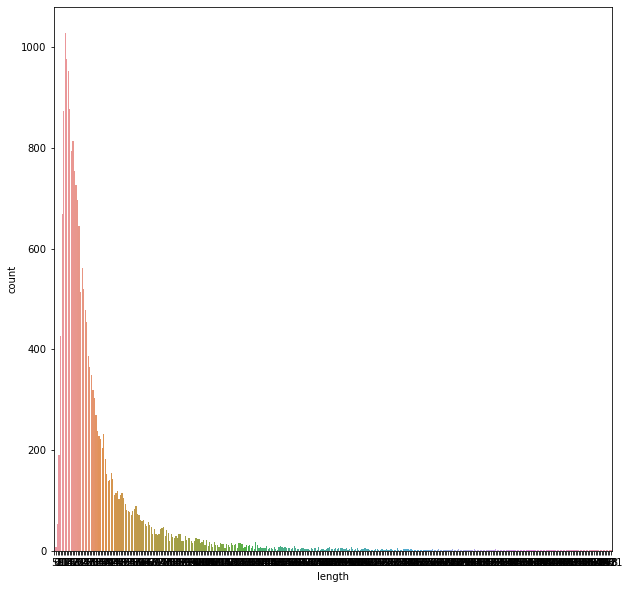

In [25]:
plt.figure(figsize=(10,10))
sns.countplot(dfs["length"])
plt.show()

In [26]:
np.mean(dfs["length"])

34.400285714285715

We see that there are many outliers and the data is heavily left skewed.So we have to do much more analysis to select the proper lenth for the text to embedd.

In [27]:
txt=" mean:{} \n median:{} \n maximum length:{} \n minimum length:{}".format(np.mean(dfs["length"]),np.median(dfs["length"]),np.max(dfs["length"]),np.min(dfs["length"]))

In [28]:
print(txt)

 mean:34.400285714285715 
 median:22.0 
 maximum length:1421 
 minimum length:5


In [29]:
def category(x):
    if 0<x<11:
        return 5
    elif 10<x<21:
        return 15
    elif 20<x<31:
        return 25
    elif 30<x<41:
        return 35
    elif 40<x<50:
        return 45
    elif 50<x<61:
        return 55
    elif 60<x<101:
        return 80
    elif 100<x<301:
        return 150
    elif 300<x<601:
        return 450
    elif 600<x<1001:
        return 800
    elif 1000<x<1501:
        return 1250
    

In [30]:
dfs["textcat"]=dfs["length"].apply(category)

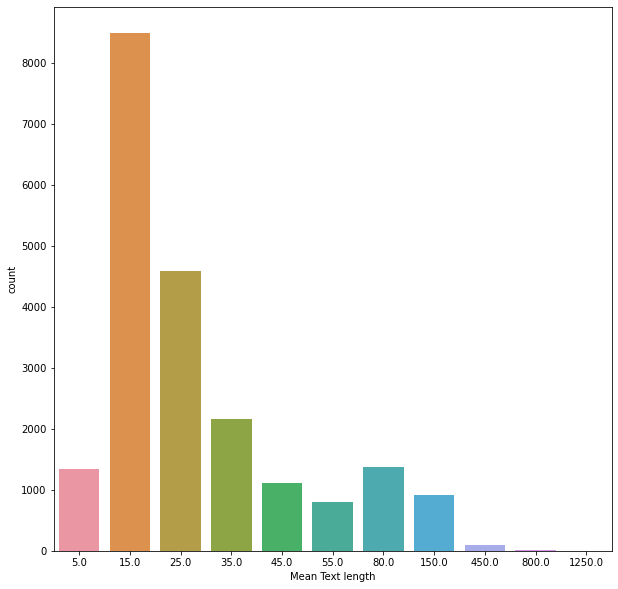

In [31]:
plt.figure(figsize=(10,10))
ax=sns.countplot(dfs["textcat"])
ax.set(xlabel="Mean Text length")
plt.show()

In [32]:
(15+25+35)/3

25.0

Ideal Text size will be of 30-40

In [33]:
c=0
for i in dfs["length"]:
    if 700<i:
      c+=1
print(c)

7


Texts with text size >700 is just 7 .We can remove them.
The above mentioned values are the index of outliers.

In [34]:
c=0
for i in dfs["length"]:
    if 40>i>1:
      c+=1
print(c)

16463


In [35]:
len(dfs["length"])

21000

In [36]:
19921/21000

0.9486190476190476

In [37]:
16321/21000

0.7771904761904762

In [38]:
19030/21000

0.9061904761904762

90% of the data lies with text size between 1 and 70.So we can remove all the other data.
77% of the data lies with text size between 40.As LSTM takes long time to train .This data is enough i guess.

In [39]:
dfs.columns

Index(['reviews', 'label', 'cat', 'length', 'textcat'], dtype='object')

In [40]:
dfs.head()

,reviews,label,cat,length,textcat
0,least think product save day keep around case ...,1,PC,10,5.0
1,lithium batteries something new introduced mar...,1,Wireless,40,35.0
2,purchased swing baby months pretty much grown ...,1,Baby,19,15.0
3,looking inexpensive desk calcolatur works ever...,1,Office Products,19,15.0
4,use twice week results great used teeth whiten...,1,Beauty,27,25.0


In [41]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   reviews  21000 non-null  object 
 1   label    21000 non-null  object 
 2   cat      21000 non-null  object 
 3   length   21000 non-null  int64  
 4   textcat  20896 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 820.4+ KB


In [42]:
dfs=dfs[dfs["length"]<41]

In [43]:
test_dfs=dfs

In [44]:
#dfs=test_dfs

In [45]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16601 entries, 0 to 20998
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   reviews  16601 non-null  object 
 1   label    16601 non-null  object 
 2   cat      16601 non-null  object 
 3   length   16601 non-null  int64  
 4   textcat  16601 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 778.2+ KB


In [46]:
dfs["label"]=dfs["label"].astype(np.float32)

we removed the outlier texts.

In [47]:
dfs["cat"].value_counts()

Jewelry                   652
Shoes                     636
Apparel                   626
Watches                   603
Office Products           590
Furniture                 585
Automotive                577
Home                      576
Wireless                  571
Musical Instruments       567
Outdoors                  563
Sports                    559
Tools                     557
Toys                      554
Lawn and Garden           551
Luggage                   550
Health & Personal Care    549
Beauty                    543
Home Improvement          542
Baby                      540
Grocery                   538
Pet Products              537
Video Games               536
Electronics               532
PC                        530
Kitchen                   525
Video DVD                 515
Camera                    511
Home Entertainment        463
Books                     423
Name: cat, dtype: int64

In [48]:
dfs["label"].value_counts()

1.0    8882
0.0    7719
Name: label, dtype: int64

In [49]:
dfs["reviews"][0]

'least think product save day keep around case need something'

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
dfs2=dfs

In [52]:
df_train,df_test,Ytrain,Ytest = train_test_split(dfs["reviews"],dfs["label"], test_size=0.2, random_state=101)

In [53]:
df_train[2]

'purchased swing baby months pretty much grown loud swing well beautiful though love colors lot settings think worth money'

In [54]:
df_train

2079     purchased item took three weeks delivered stor...
6697     husband head try connect nature book great sou...
15818    made solar lights sam live thank happy batteri...
7200     bought son really loves exceptional quality mu...
18571    straight wolf head received flat oval surround...
                               ...                        
2953     first awful improvement still load garbage was...
15618    greatest bubbles easy year old blow bubbles ye...
6704     product awesome sparky habit barking day night...
9477     tell story bad guy longer bad guy despicable e...
16630    ordered st time arrived without detachable cup...
Name: reviews, Length: 13280, dtype: object

In [55]:
vocab={'pad':0,"unk":1}
for review in dfs["reviews"]:
    
    for word in review.split():
        if word not in vocab:
            vocab[word]=len(vocab)
print(len(vocab))

19927


In [56]:
import gensim

In [58]:
embed_dim=4

In [63]:
dfs["reviews"]

0        least think product save day keep around case ...
1        lithium batteries something new introduced mar...
2        purchased swing baby months pretty much grown ...
3        looking inexpensive desk calcolatur works ever...
4        use twice week results great used teeth whiten...
                               ...                        
20994    slippers soft warm cozy wear size b size fits ...
20995    bought work high arches use arch support heels...
20996    crocs one two brands shoes feet day work love ...
20997    love moccasins fit like custom made br soft co...
20998    wish little durable got caught bolt crossing b...
Name: reviews, Length: 16601, dtype: object

In [62]:
wordmodel=gensim.models.Word2Vec(sentences=dfs["reviews"],min_count=1,size=embed_dim,window=5,workers=4)
words=list(wordmodel.wv.vocab)
print(len(words))

27


In [111]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model